In [ ]:
"""
Predator and Prey Cellular Automaton
Developed by Fraser Love on 30/09/18
Dependencies: Pygame
Ran on CPU - Reccomended to use on High-Range CPU
"""

import pygame, sys, random, time
from pygame.locals import *

session = True
dimensions = (1920, 1080)
spacing = 0                         # Sets space between each cell
cell_size = 4                       # Sets the drawn size of each cell
frame_rate = 30
prey_probability = 0.3             # Probability of Prey reproducing - change for different results (choose 0.5 for spiral)
predator_probability = 0.2          # Probability of Predator reproducing - change for differnent results (chose 0.4 for spiral)
start_time = time.time()

cells_x = int(dimensions[0] / cell_size)
cells_y = int(dimensions[1] / cell_size)
cells = [[0 for x in range(cells_y)] for y in range(cells_x)]
new = [[0 for x in range(cells_y)] for y in range(cells_x)]

pygame.init()
display = pygame.display.set_mode((cells_x*(cell_size+spacing), cells_y*(cell_size+spacing)))
display.fill(pygame.Color("black"))
clock = pygame.time.Clock()


def create_grid():
    #  Assigning random values to our grid of cells: 0 - dead, 1 - prey, 2 - predator
    for x in range(cells_x):
        for y in range(cells_y):
            cells[x][y] = random.choice([0, 0, 1, 2])


def growth():
    for x in range(cells_x):
        for y in range(cells_y):
            if cells[x][y] == 1:
                new[x][y] = cells[x][y]
                for i in [-1, 0, 1]:
                    for j in [-1, 0, 1]:
                        if x + i < cells_x and y + j < cells_y and cells[x + i][y + j] == 0:
                            if random.uniform(0, 1) < prey_probability:
                                new[x + i][y + j] = 1
            if cells[x][y] == 2:
                new[x][y] = cells[x][y]
                die = True
                for i in [-1, 0, 1]:
                    for j in [-1, 0, 1]:
                        if x + i < cells_x and y + j < cells_y and new[x + i][y + j] == 1:
                            die = False
                            if random.uniform(0, 1) < predator_probability:
                                new[x + i][y + j] = 2
                if die == True:
                    new[x][y] = 0

def draw():
    for i in range(cells_x):
        for j in range(cells_y):
            if new[i][j] == 1:
                pygame.draw.rect(display, (255, 255, 255),
                                 (i * (cell_size + spacing), j * (cell_size + spacing), cell_size, cell_size), 0)
            if new[i][j] == 2:
                pygame.draw.rect(display, (70, 70, 70),
                                 (i * (cell_size + spacing), j * (cell_size + spacing), cell_size, cell_size), 0)
            cells[i][j] = new[i][j]
    pygame.display.update()
    clock.tick(frame_rate)

def run_automaton():
    generation = 1
    create_grid()
    while session:
        pygame.display.set_caption('Predator and Prey: Generation {}  Time: {}'.format(str(generation), round(time.time() - start_time,2)))
        display.fill("black")
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit(); sys.exit();

        growth()
        draw()
        generation += 1

if __name__ == "__main__":
    run_automaton()

In [12]:
import pygame, sys, random, time
import xarray as xr

In [75]:
# session = True
dimensions = (400, 200)
spacing = 0                         # Sets space between each cell
cell_size = 4                       # Sets the drawn size of each cell
# frame_rate = 30
prey_probability = 0.3             # Probability of Prey reproducing - change for different results (choose 0.5 for spiral)
predator_probability = 0.2          # Probability of Predator reproducing - change for differnent results (chose 0.4 for spiral)
# start_time = time.time()

In [76]:
cells_x = int(dimensions[0] / cell_size)
cells_y = int(dimensions[1] / cell_size)
cells = [[0 for x in range(cells_y)] for y in range(cells_x)]
new = [[0 for x in range(cells_y)] for y in range(cells_x)]

In [77]:

def create_grid():
    #  Assigning random values to our grid of cells: 0 - dead, 1 - prey, 2 - predator
    for x in range(cells_x):
        for y in range(cells_y):
            cells[x][y] = random.choice([0, 0, 1, 2])

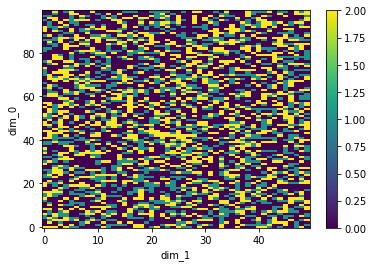

In [78]:
create_grid()
xr.DataArray(cells).plot(robust=True)

In [79]:
cells[4][1]

2

In [80]:
def growth():
    for x in range(cells_x):
        for y in range(cells_y):
            if cells[x][y] == 1:
                new[x][y] = cells[x][y]
                for i in [-1, 0, 1]:
                    for j in [-1, 0, 1]:
                        if x + i < cells_x and y + j < cells_y and cells[x + i][y + j] == 0:
                            if random.uniform(0, 1) < prey_probability:
                                new[x + i][y + j] = 1
            if cells[x][y] == 2:
                new[x][y] = cells[x][y]
                die = True
                for i in [-1, 0, 1]:
                    for j in [-1, 0, 1]:
                        if x + i < cells_x and y + j < cells_y and new[x + i][y + j] == 1:
                            die = False
                            if random.uniform(0, 1) < predator_probability:
                                new[x + i][y + j] = 2
                if die == True:
                    new[x][y] = 0

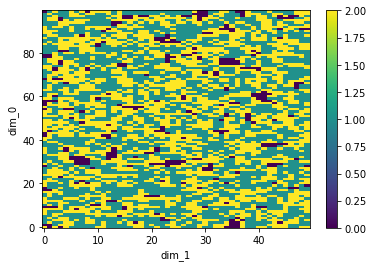

In [152]:
growth()

xr.DataArray(new).plot()

## New Cellular Automata

In [105]:
import xarray as xr

In [173]:
cells = [1,0,1,0,0,0,0,1,0,1,1,1,0,0,0,1,1,1,0,0]
len(cells)

20

In [174]:
## just a simple rule for now
def rules(a, b, c):
    ruleset = [0,1,0,1,1,0,1,0]
    if a == 1 and b == 1 and c == 1:
        return ruleset[0]
    elif a == 1 and b == 1 and c == 0:
        return ruleset[1]
    elif a == 1 and b == 0 and c == 1:
        return ruleset[2]
    elif a == 1 and b == 0 and c == 0:
        return ruleset[3]
    elif a == 0 and b == 1 and c == 1:
        return ruleset[4]
    elif a == 0 and b == 1 and c == 0:
        return ruleset[5]
    elif a == 0 and b == 0 and c == 1:
        return ruleset[6]
    elif a == 0 and b == 0 and c == 0:
        return ruleset[7]  
    else:
        return 0

In [ ]:
def rules(a, b, c):
    ruleset = [0,1,1,1,1,0,1,1]

    pn = str(a) + str(b) + str(c)
    

In [185]:
fullarray = []

for j in range(20):

    # create a list with the same length
    newcells = [None] * len(cells)
    newcells[0] = cells[0]
    newcells[len(newcells) - 1] = cells[len(cells) -1]

    # loop through the cells
    for i in range(1, len(cells) -1 ):
        left = cells[i-1]
        middle = cells[i]
        right = cells[i+1]

        newstate = rules(left, middle, right)

        newcells[i] = newstate

    fullarray.append(newcells)

    cells = newcells

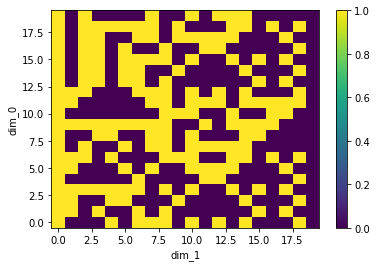

In [186]:
xr.DataArray(fullarray).plot()

In [200]:
a = str(0) + str(1) + str(1)
a

'011'

In [201]:
int(a, 2)

3